# <p style="background-color:#F8F1E8; font-family:newtimeroman;color:#602F44; font-size:150%; text-align:center; border-radius: 15px 50px;"> Multi-Class Prediction of Cirrhosis 🩺  </p>
   

<div style="border-radius:10px; border:#4E5672 solid; padding: 15px; background-color: #F8F1E8; font-size:100%; text-align:left">

<h3 align="left"><font color='#4E5672'>📝  Project Description</font></h3>


<div style="border-radius:10px; border:#4E5672 solid; padding: 15px; background-color: #F8F1E8; font-size:100%; text-align:left">

<h3 align="left"><font color='#4E5672'>Understanding Cirrhosis 🧬:</font></h3>

**Cirrhosis** is a late stage of scarring (fibrosis) of the liver caused by many forms of liver diseases and conditions, such as hepatitis and chronic alcoholism. Each time your liver is injured — whether by disease, excessive alcohol consumption, or another cause — it tries to repair itself. In the process, scar tissue forms. As the cirrhosis progresses, more and more scar tissue forms, making it difficult for the liver to function (decompensated cirrhosis).

The liver damage done by cirrhosis generally can't be undone. But if liver cirrhosis is diagnosed early and the cause is treated, further damage can be limited and, rarely, reversed.

    


<div style="border-radius:10px; border:#4E5672 solid; padding: 15px; background-color: #F8F1E8; font-size:100%; text-align:left">

<h3 align="left"><font color='#4E5672'>Evaluation Method: Multi-class Logarithmic Loss 📊:</font></h3>

In this project, we are tasked with predicting the outcomes of patients with cirrhosis using a multi-class approach. The evaluation metric used is the **multi-class logarithmic loss**. This metric quantifies the accuracy of a classifier by penalizing false classifications. Lower values of this loss indicate better predictions.


The logarithmic loss is calculated for each patient and the average loss is used to evaluate the model. For each predicted probability $( p_{ij})$ that observation $( i )$ belongs to class  $( j )$, the log loss is:

$$
\text{Log Loss} = - \frac{1}{N} \sum_{i=1}^{N} \sum_{j=1}^{M} y_{ij} \log(p_{ij})
$$

**where:**
- $N$ is the number of observations.
- $M$ is the number of class labels.
- $y_{ij}$ is 1 if observation $i$ is in class $j$ and 0 otherwise.
- $p_{ij}$ is the predicted probability that observation $i$ belongs to class $j$.


### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color: #5C4033; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #003300">Import libraries</p>

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt

import optuna

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, log_loss

from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

!wget https://raw.githubusercontent.com/h4pZ/rose-pine-matplotlib/main/themes/rose-pine-dawn.mplstyle -P /tmp
plt.style.use("/tmp/rose-pine-dawn.mplstyle")

--2023-12-08 10:19:09--  https://raw.githubusercontent.com/h4pZ/rose-pine-matplotlib/main/themes/rose-pine-dawn.mplstyle
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40905 (40K) [text/plain]
Saving to: ‘/tmp/rose-pine-dawn.mplstyle’

rose-pine-dawn.mpls 100%[===================>]  39.95K  --.-KB/s    in 0.008s  

2023-12-08 10:19:10 (5.08 MB/s) - ‘/tmp/rose-pine-dawn.mplstyle’ saved [40905/40905]



In [2]:
# Load thg Data
train = pd.read_csv('/kaggle/input/playground-series-s3e26/train.csv').drop(columns=['id'],axis=1)
test = pd.read_csv('/kaggle/input/playground-series-s3e26/test.csv').drop("id",axis=1)
sample_submisiion = pd.read_csv('/kaggle/input/playground-series-s3e26/sample_submission.csv')

# <p style="background-color:#F8F1E8; font-family:newtimeroman;color:#602F44; font-size:150%; text-align:center; border-radius: 15px 50px;"> 🔍 EDA: Deciphering the Patterns in Cirrhosis Patient Data</p>


<div style="border-radius:10px; border:#6B8BA0 solid; padding: 15px; background-color: #F2EADF; font-size:100%; text-align:left">

<h3 align="left"><font color='#6B8BA0'>💡 Features: </font></h3>


1. **N_Days:** The number of days the patient has been observed.

2. **Drug:** The type of drug administered to the patient. This could be 'D-penicillamine' or 'Placebo'.

3. **Age:** The age of the patient at the start of the study, measured in days.

4. **Sex:** The gender of the patient, either Male (M) or Female (F).

5. **Ascites:**  Indicates the presence of ascites, a condition characterized by the accumulation of fluid in the peritoneal cavity. 'N' for No, 'Y' for Yes.

6. **Hepatomegaly:** Indicates whether the patient has an enlarged liver. 'N' for No, 'Y' for Yes.

7. **Spiders:** Refers to the presence of spider nevi, a type of vascular lesion. 'N' for No, 'Y' for Yes.

8. **Edema:** Swelling caused by excess fluid trapped in the body's tissues. 'N' for No, 'S' for 

9. **Bilirubin:** The level of bilirubin in the blood, measured in mg/dL. High levels may indicate liver dysfunction.

10. **Cholesterol:** The level of cholesterol in the blood, measured in mg/dL.

11. **Albumin:** The level of albumin in the blood, measured in g/dL. Low levels can indicate liver disease.

12. **Copper:** he level of copper in the blood, measured in µg/dL.
    
13. **Alk_Phos:** Alkaline phosphatase levels in the blood, measured in U/L. Elevated levels can indicate liver disease.

14. **SGOT:** Serum Glutamic-Oxaloacetic Transaminase levels, an enzyme found in the liver, heart, and other tissues. High levels can indicate liver damage.

15. **Tryglicerides:** The level of triglycerides in the blood, measured in mg/dL.

16. **Platelets:** The platelet count in the blood, measured in 1000 cells/µL.

17. **Prothrombin:** The prothrombin time, measured in seconds. It's a measure of how quickly blood clots.

18. **Stage:** The stage of liver disease, ranging from 1 (least severe) to 4 (most severe).

19. **Status (Target):** The outcome status of the patient: 'C' for censored, 'CL' for alive due to liver transplant, and 'D' for deceased.


In [3]:
def analyze_dataframe(df):
    """
    Analyze a pandas DataFrame and provide a summary of its characteristics.

    Parameters:
    df (pandas.DataFrame): The input DataFrame to analyze.

    Returns:
    None
    """
    print("DataFrame Information:")
    print("----------------------")
    display(df.info(verbose=True, show_counts=True))
    print("\n")

    print("DataFrame Values:")
    print("----------------------")
    display(df.head(5).T)
    print("\n")

    print("DataFrame Description:")
    print("----------------------")
    display(df.describe().T)
    print("\n")

    print("Number of Null Values:")
    print("----------------------")
    display(df.isnull().sum())
    print("\n")

    print("Number of Duplicated Rows:")
    print("--------------------------")
    display(df.duplicated().sum())
    print("\n")

    print("Number of Unique Values:")
    print("------------------------")
    display(df.nunique())
    print("\n")

    print("DataFrame Shape:")
    print("----------------")
    print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

# Usage
analyze_dataframe(train)

DataFrame Information:
----------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         7905 non-null   int64  
 1   Drug           7905 non-null   object 
 2   Age            7905 non-null   int64  
 3   Sex            7905 non-null   object 
 4   Ascites        7905 non-null   object 
 5   Hepatomegaly   7905 non-null   object 
 6   Spiders        7905 non-null   object 
 7   Edema          7905 non-null   object 
 8   Bilirubin      7905 non-null   float64
 9   Cholesterol    7905 non-null   float64
 10  Albumin        7905 non-null   float64
 11  Copper         7905 non-null   float64
 12  Alk_Phos       7905 non-null   float64
 13  SGOT           7905 non-null   float64
 14  Tryglicerides  7905 non-null   float64
 15  Platelets      7905 non-null   float64
 16  Prothrombin    7905 non-null   float64
 17  Stage 

None



DataFrame Values:
----------------------


,0,1,2,3,4
N_Days,999,2574,3428,2576,788
Drug,D-penicillamine,Placebo,Placebo,Placebo,Placebo
Age,21532,19237,13727,18460,16658
Sex,M,F,F,F,F
Ascites,N,N,N,N,N
Hepatomegaly,N,N,Y,N,Y
Spiders,N,N,Y,N,N
Edema,N,N,Y,N,N
Bilirubin,2.3,0.9,3.3,0.6,1.1
Cholesterol,316.0,364.0,299.0,256.0,346.0




DataFrame Description:
----------------------


,count,mean,std,min,25%,50%,75%,max
N_Days,7905.0,2030.173308,1094.233744,41.00,1230.00,1831.00,2689.00,4795.00
Age,7905.0,18373.146490,3679.958739,9598.00,15574.00,18713.00,20684.00,28650.00
Bilirubin,7905.0,2.594485,3.812960,0.30,0.70,1.10,3.00,28.00
Cholesterol,7905.0,350.561923,195.379344,120.00,248.00,298.00,390.00,1775.00
Albumin,7905.0,3.548323,0.346171,1.96,3.35,3.58,3.77,4.64
Copper,7905.0,83.902846,75.899266,4.00,39.00,63.00,102.00,588.00
Alk_Phos,7905.0,1816.745250,1903.750657,289.00,834.00,1181.00,1857.00,13862.40
SGOT,7905.0,114.604602,48.790945,26.35,75.95,108.50,137.95,457.25
Tryglicerides,7905.0,115.340164,52.530402,33.00,84.00,104.00,139.00,598.00
Platelets,7905.0,265.228969,87.465579,62.00,211.00,265.00,316.00,563.00




Number of Null Values:
----------------------


N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64



Number of Duplicated Rows:
--------------------------


0



Number of Unique Values:
------------------------


N_Days           461
Drug               2
Age              391
Sex                2
Ascites            2
Hepatomegaly       2
Spiders            2
Edema              3
Bilirubin        111
Cholesterol      226
Albumin          160
Copper           171
Alk_Phos         364
SGOT             206
Tryglicerides    154
Platelets        227
Prothrombin       49
Stage              4
Status             3
dtype: int64



DataFrame Shape:
----------------
Rows: 7905, Columns: 19


<div style="border-radius:10px; border:#484366 solid; padding: 15px; background-color: #FFEBCC; font-size:100%; text-align:left">

<h3 align="left"><font color='#484366'>💬 Comment</font></h3>

Identifying categorical and numerical columns



In [4]:
def cat_and_num(df):
    """
    Separates columns of a DataFrame into categorical and numerical lists.

    Parameters:
    - df (DataFrame): The DataFrame to process.

    Returns:
    - Tuple: (categorical_columns, numerical_columns)
    """    
    categorical_columns = [col for col in df.columns if df[col].dtype == "object" if col != 'Status' ]
    
    numerical_columns = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
    
    return categorical_columns, numerical_columns

In [5]:
categorical_columns_train , numerical_columns_train = cat_and_num(train)

In [6]:
numerical_columns_train

['N_Days',
 'Age',
 'Bilirubin',
 'Cholesterol',
 'Albumin',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin',
 'Stage']

In [7]:
categorical_columns_train

['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

# Data Visualizatio 📊

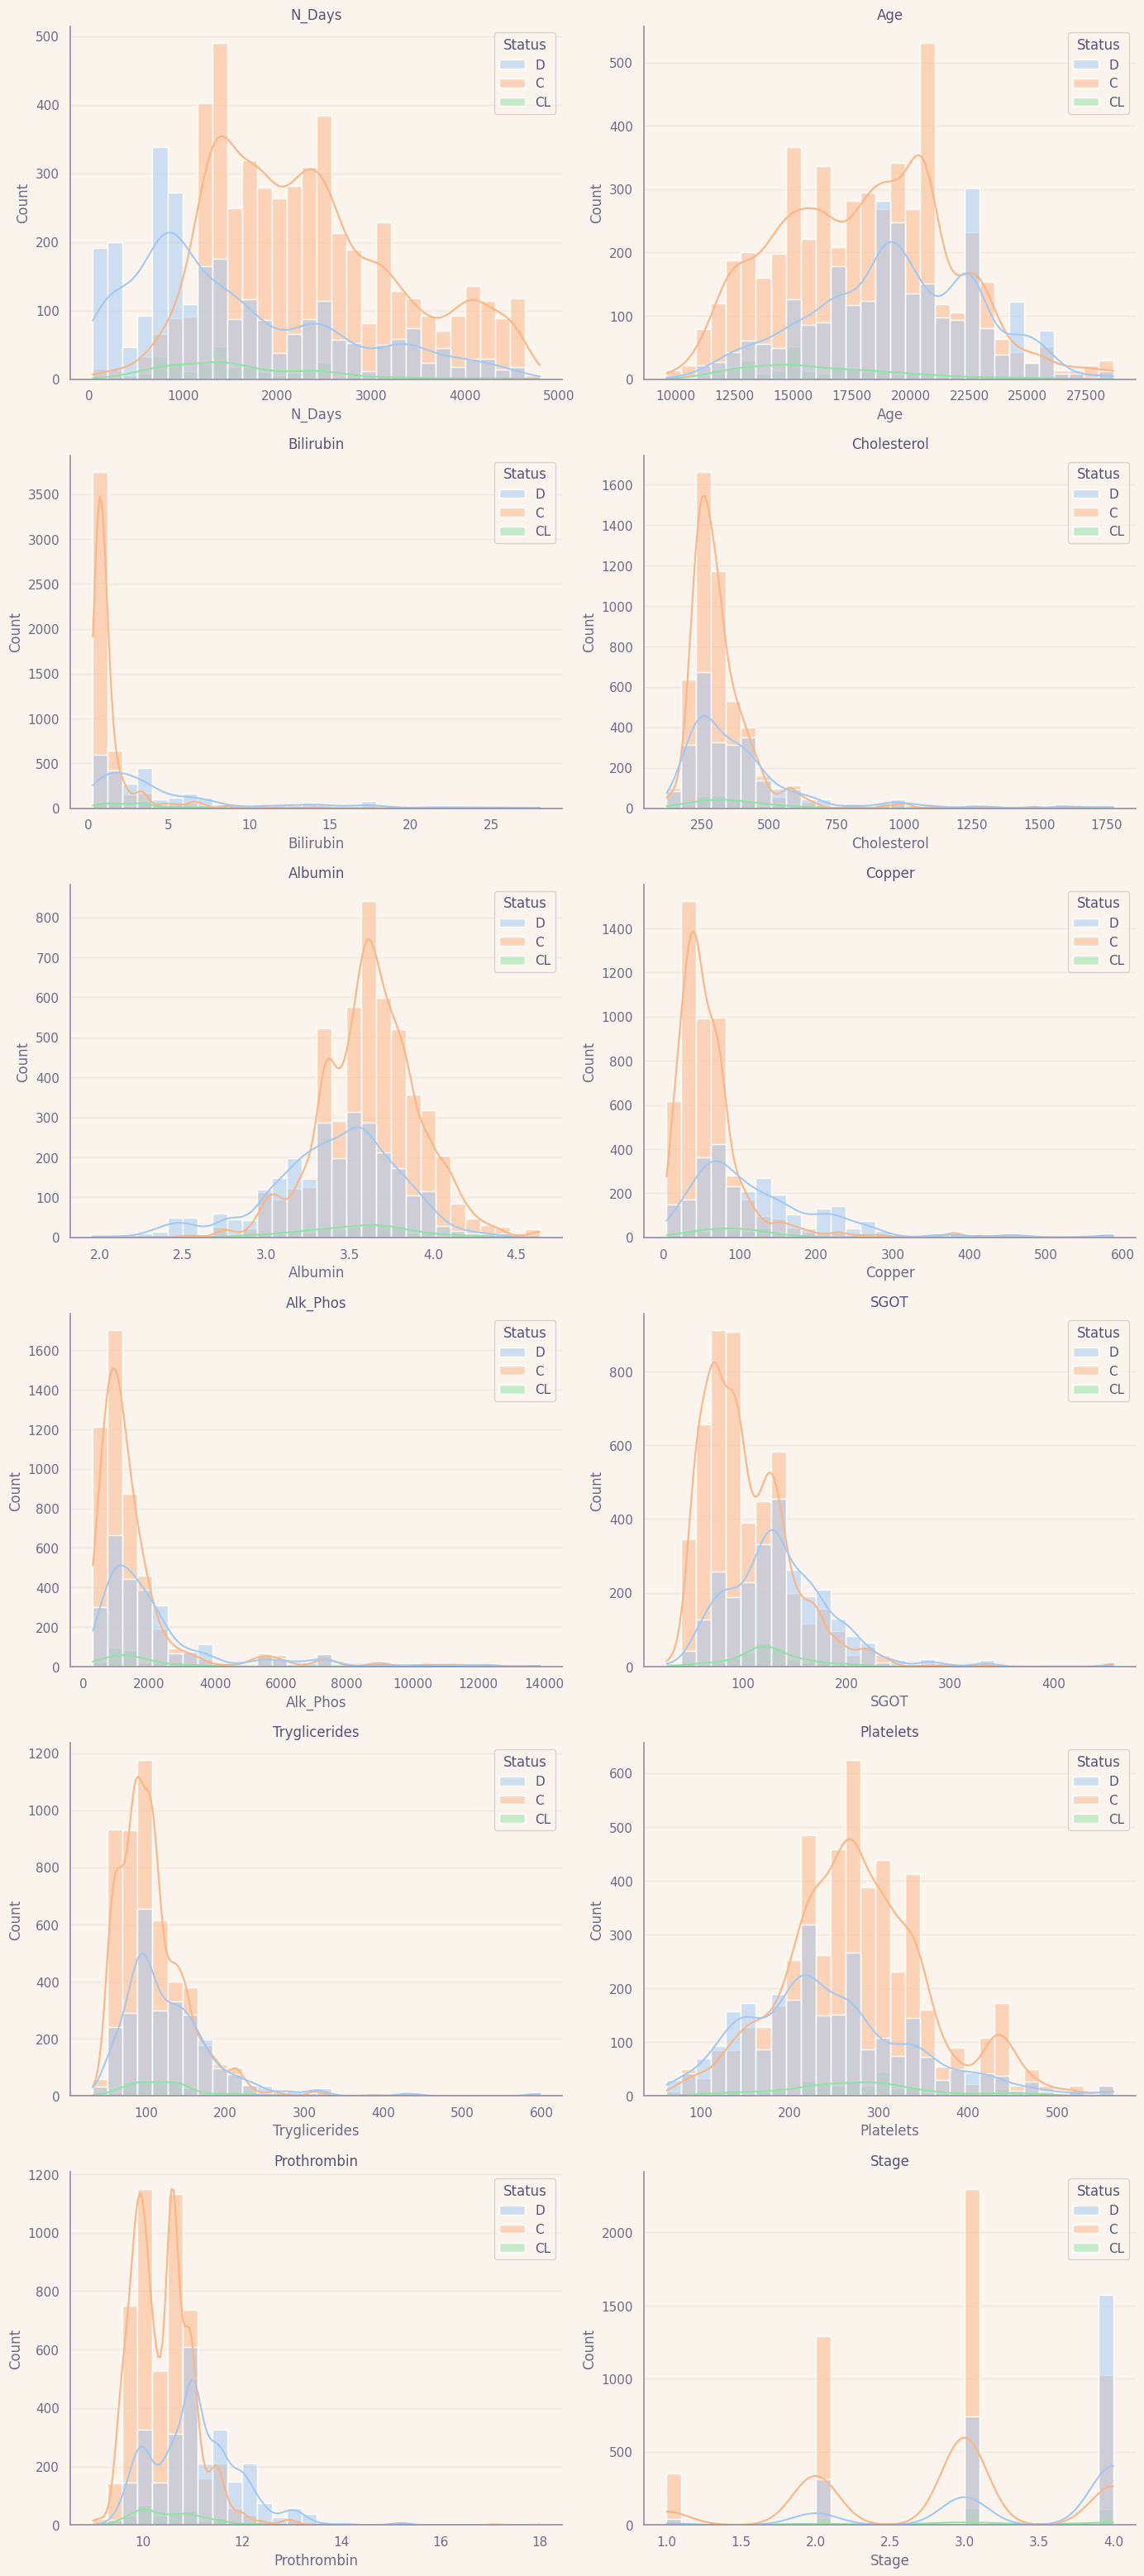

In [8]:
# Visualizing Numerical Columns
plt.figure(figsize=(14, len(numerical_columns_train)*3))
for i , col in enumerate(numerical_columns_train):
    plt.subplot(len(numerical_columns_train)//2+1,2,i+1)
    sns.histplot(x=col, hue="Status", data=train, bins=30, kde=True, palette="pastel")
    plt.title(col)
    plt.tight_layout()

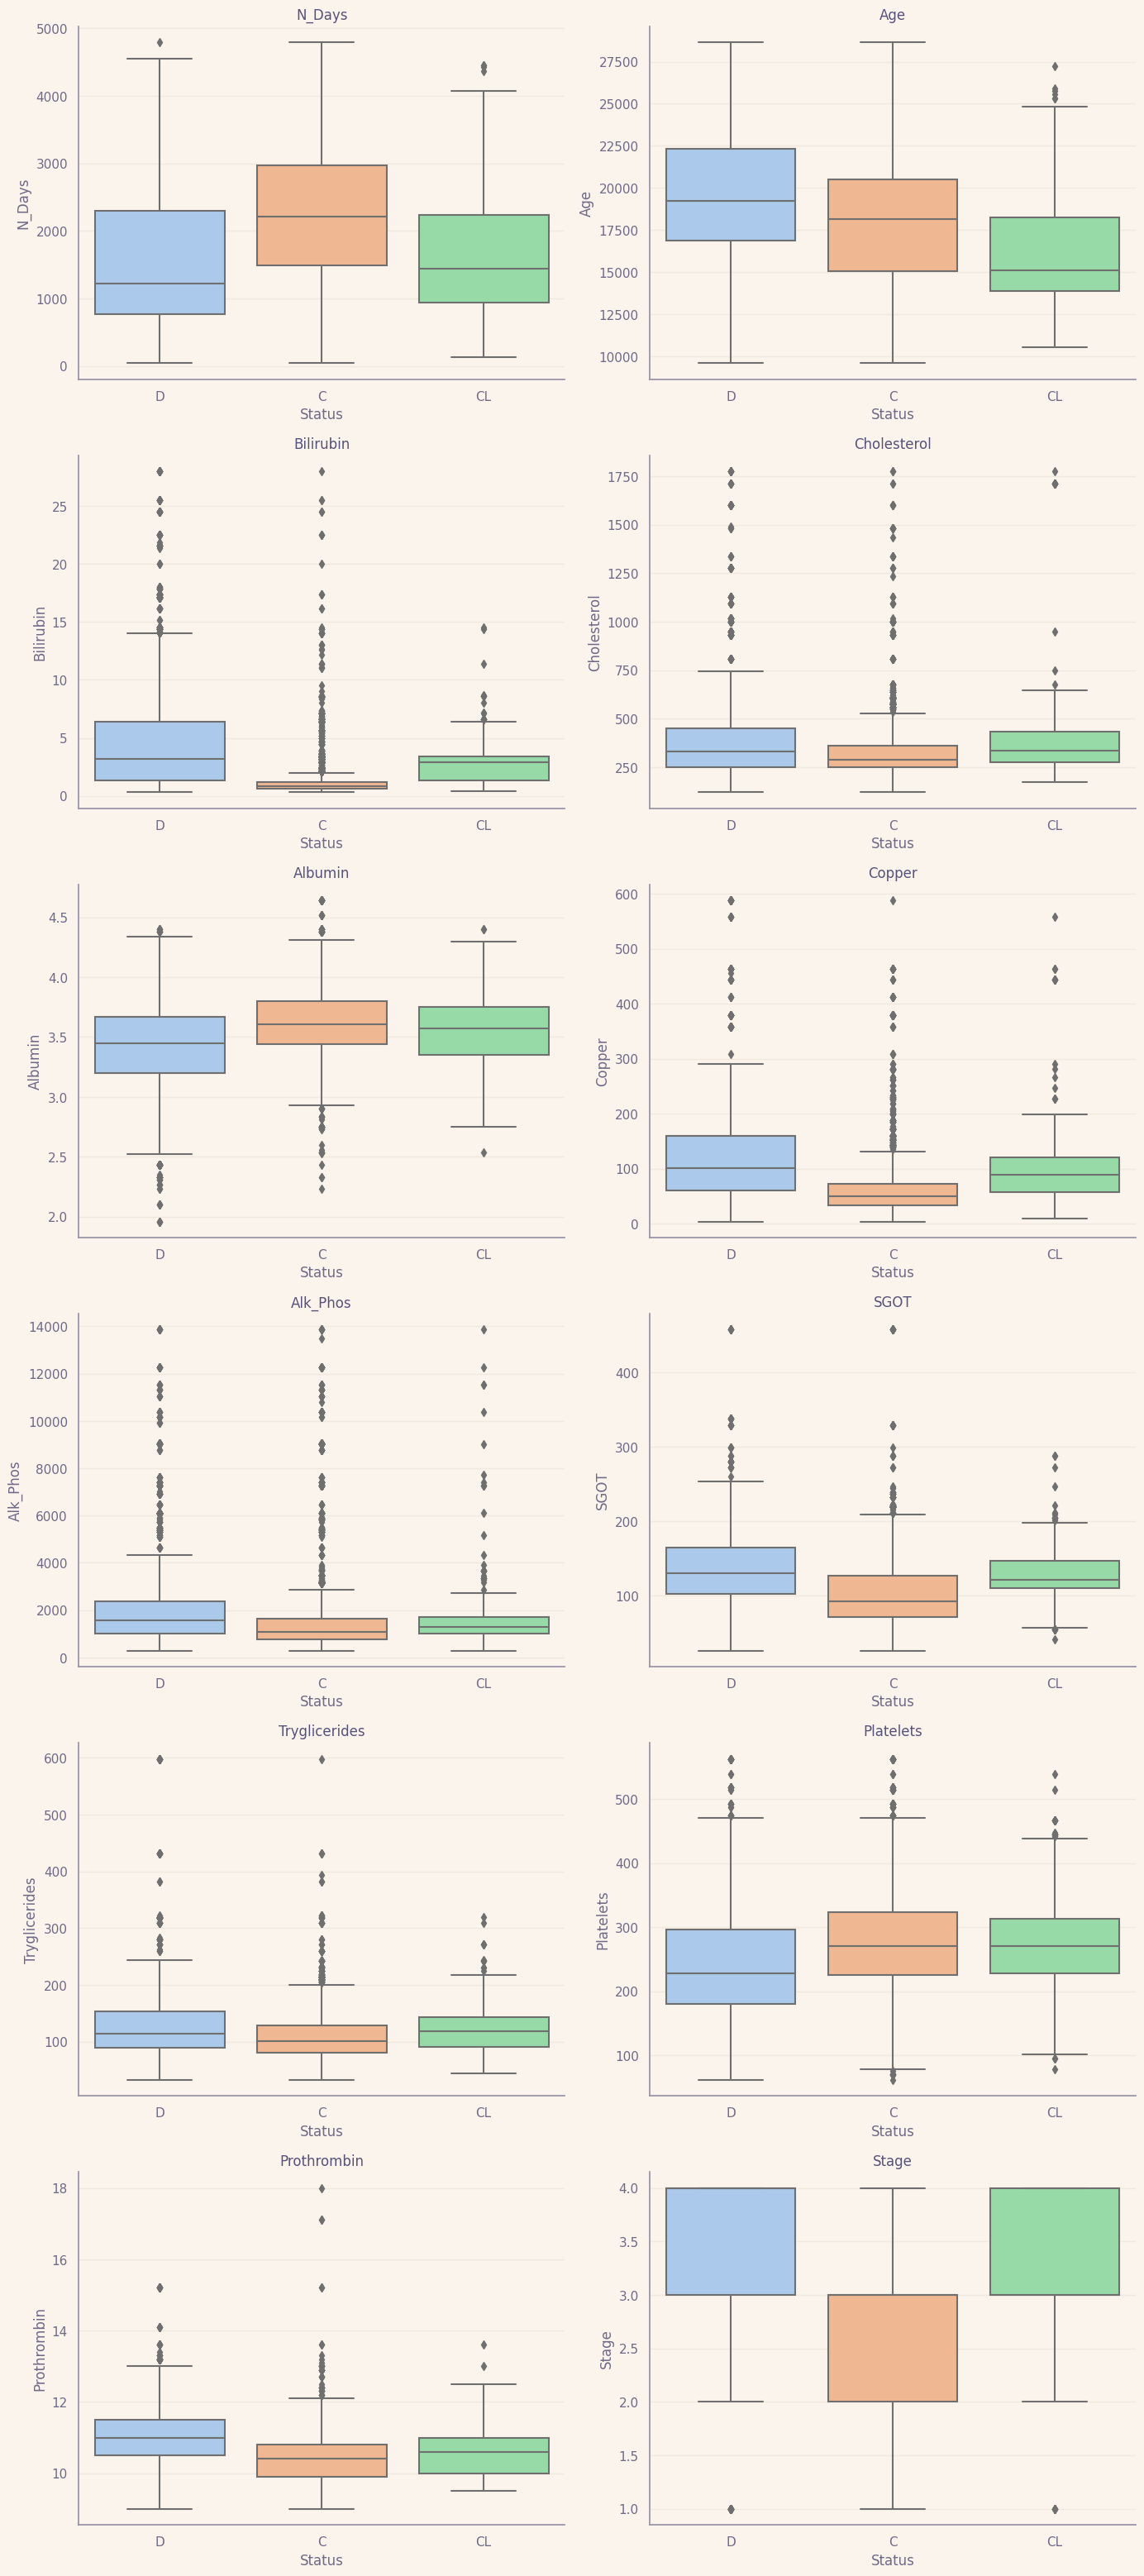

In [9]:
# Visualizing Outliers in Numerical Columns
plt.figure(figsize=(14, len(numerical_columns_train)*3))
for i , col in enumerate(numerical_columns_train):
    plt.subplot(len(numerical_columns_train)//2+1,2,i+1)
    sns.boxplot(x="Status", y=col, data=train,palette="pastel")
    plt.title(col)
    plt.tight_layout()

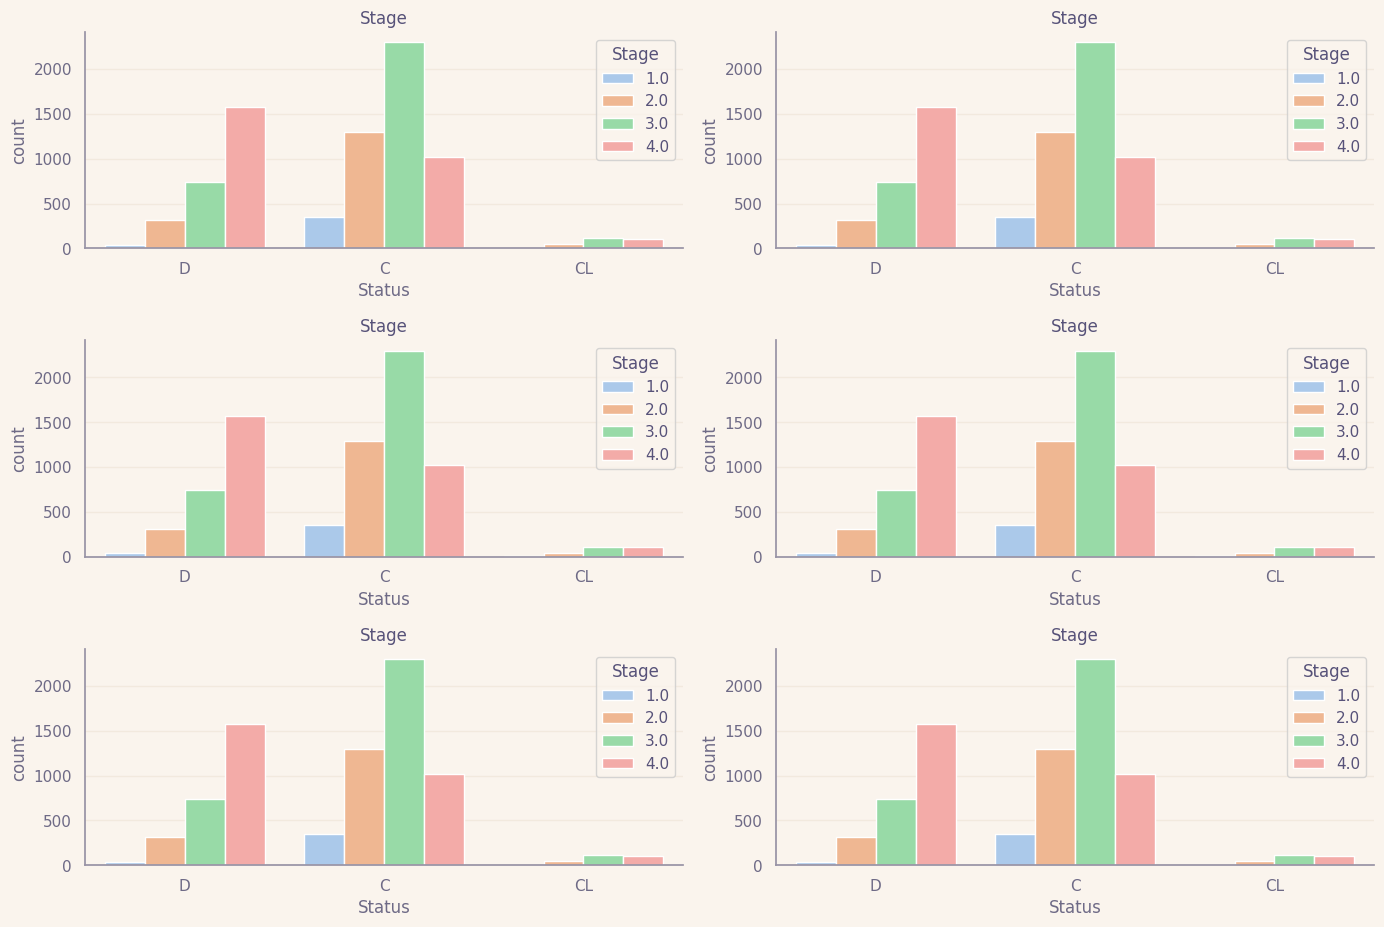

In [10]:
# Visualizing Categorical Columns
plt.figure(figsize=(14,len(categorical_columns_train)*2))
for i,column in enumerate(categorical_columns_train):
    plt.subplot(len(categorical_columns_train)//2+1,2,i+1)
    sns.countplot(x="Status", hue=col, data=train,palette="pastel")
    plt.title(col)
    plt.tight_layout()

<div style="border-radius:10px; border:#484366 solid; padding: 15px; background-color: #FFEBCC; font-size:100%; text-align:left">

<h3 align="left"><font color='#484366'>💬 Comment</font></h3>

Correlation matrix just for the **Numerical Data**


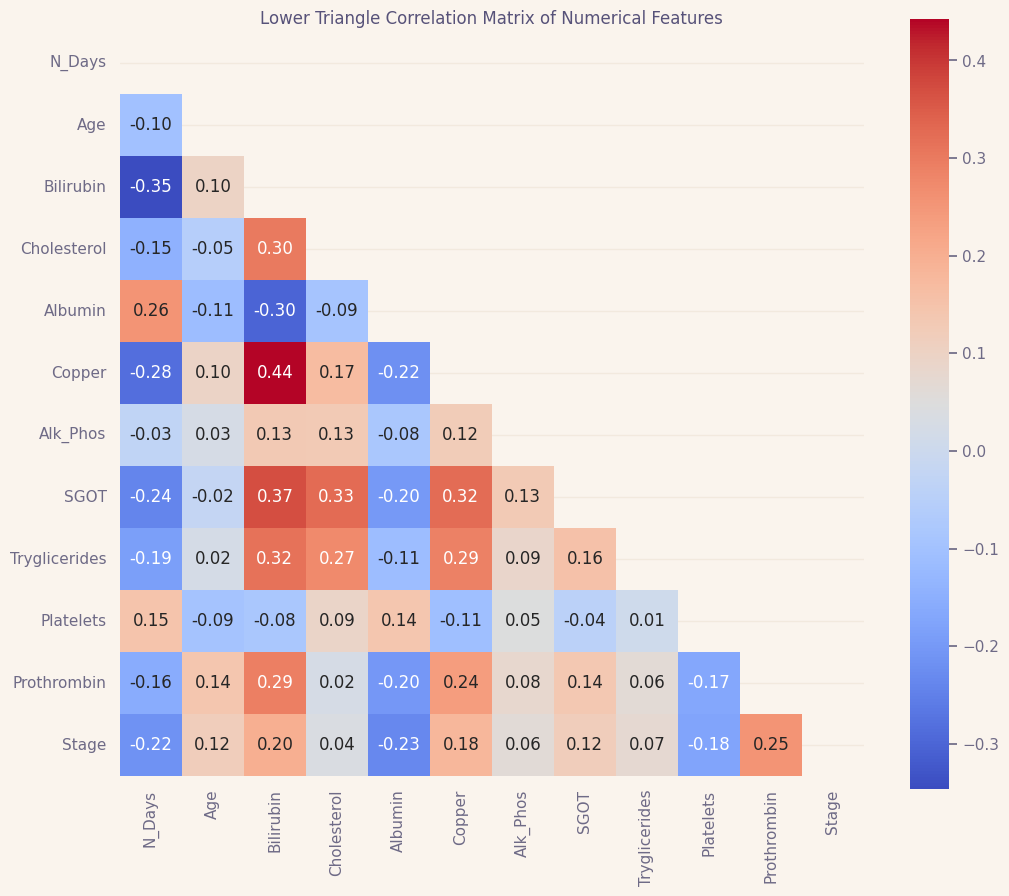

In [11]:
# Compute the correlation matrix
corr_matrix = train[numerical_columns_train].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", square=True)

# Add a title
plt.title('Lower Triangle Correlation Matrix of Numerical Features')

# Show the plot
plt.show()


# <p style="background-color:#F8F1E8; font-family:newtimeroman;color:#602F44; font-size:150%; text-align:center; border-radius: 15px 50px;"> Feature Engineering 🛠️</p>

In [12]:
train = pd.get_dummies(train, columns=categorical_columns_train, drop_first=True, dtype=int)
test = pd.get_dummies(test, columns=categorical_columns_train, drop_first=True, dtype=int)

In [13]:
train['Status'] = train['Status'].map({"D":0, "C":1, "CL":2})

In [14]:
train.head(10).T

,0,1,2,3,4,5,6,7,8,9
N_Days,999.00,2574.00,3428.00,2576.0,788.00,703.00,1300.00,1615.00,2050.00,2615.0
Age,21532.00,19237.00,13727.00,18460.0,16658.00,19270.00,17703.00,21281.00,20684.00,15009.0
Bilirubin,2.30,0.90,3.30,0.6,1.10,0.60,1.00,0.60,0.70,0.9
Cholesterol,316.00,364.00,299.00,256.0,346.00,227.00,328.00,273.00,360.00,478.0
Albumin,3.35,3.54,3.55,3.5,3.65,3.46,3.35,3.94,3.65,3.6
Copper,172.00,63.00,131.00,58.0,63.00,34.00,43.00,36.00,72.00,39.0
Alk_Phos,1601.00,1440.00,1029.00,1653.0,1181.00,6456.20,1677.00,598.00,3196.00,1758.0
SGOT,179.80,134.85,119.35,71.3,125.55,60.63,137.95,52.70,94.55,171.0
Tryglicerides,63.00,88.00,50.00,96.0,96.00,68.00,90.00,214.00,154.00,140.0
Platelets,394.00,361.00,199.00,269.0,298.00,213.00,291.00,227.00,269.00,234.0


In [15]:
test.head(10).T

,0,1,2,3,4,5,6,7,8,9
N_Days,3839.00,2468.00,51.00,2330.00,1615.00,1433.00,1785.00,1925.00,41.0,1765.00
Age,19724.00,14975.00,13149.00,20510.00,21904.00,20510.00,19060.00,19994.00,24064.0,28650.00
Bilirubin,1.20,1.10,2.00,0.60,1.40,0.80,0.40,1.80,17.9,6.40
Cholesterol,546.00,660.00,151.00,293.00,277.00,198.00,273.00,244.00,178.0,243.00
Albumin,3.37,4.22,2.96,3.85,2.97,3.94,3.65,3.26,2.1,3.35
Copper,65.00,94.00,46.00,40.00,121.00,38.00,25.00,64.00,220.0,380.00
Alk_Phos,1636.00,1257.00,961.00,554.00,1110.00,911.00,671.00,6121.80,705.0,983.00
SGOT,151.90,151.90,69.75,125.55,125.00,57.35,84.00,60.63,338.0,158.10
Tryglicerides,90.00,155.00,101.00,56.00,126.00,56.00,177.00,92.00,229.0,154.00
Platelets,430.00,227.00,213.00,270.00,221.00,280.00,284.00,183.00,62.0,97.00


# <p style="background-color:#F8F1E8; font-family:newtimeroman;color:#602F44; font-size:150%; text-align:center; border-radius: 15px 50px;"> Models ⚖️</p>


### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color: #5C4033; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #003300">Split Data</p>

In [16]:
# Prepare the features (X) and target (y)
X = train.drop(columns=['Status'], axis =1)
y = train['Status']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 2668, stratify=y)

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color: #5C4033; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #003300">XGBoost Classifier</p>

<div style="border-radius:10px; border:#6B8BA0 solid; padding: 15px; background-color: #F2EADF; font-size:100%; text-align:left">

<h3 align="left"><font color='#6B8BA0'> 🚀 Hyperparameter Tuning</font></h3>


In [18]:
def objective_xg(trial):
    """
    Objective function for hyperparameter optimization using Optuna.

    Args:
    trial (optuna.trial): A trial instance of Optuna optimization.

    Returns:
    float: The value of the evaluation metric (log_loss) for the trial.
    """
    params = {
        'booster': trial.suggest_categorical('booster', ['gbtree']),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
        'n_estimators': trial.suggest_int('n_estimators', 300, 700),
        'min_child_weight': trial.suggest_int('min_child_weight', 0.01, 1),
        'subsample': trial.suggest_loguniform('subsample', 0.1, 1.0),
        'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.1, 1),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1),
        'colsample_bynode': trial.suggest_float('colsample_bynode', 0.1, 1),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 1),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 1),
        'eval_metric':trial.suggest_categorical('eval_metric', ['mlogloss']),
    }

    # Initialize and fit the model
    model_xgb = XGBClassifier(**params)
    
    model_xgb.fit(X_train, y_train)

    # Predict probabilities and calculate log loss
    y_pred = model_xgb.predict_proba(X_test)
    
    return log_loss(y_test, y_pred)

In [19]:
# Create a study object and perform optimization
study_xgb = optuna.create_study(direction='minimize')
optuna.logging.set_verbosity(optuna.logging.WARNING)  # Suppressing detailed logging output
study_xgb.optimize(objective_xg, n_trials=50, show_progress_bar=True)

[I 2023-12-08 10:20:00,422] A new study created in memory with name: no-name-0215d194-3c59-4c10-8dee-4c445a149ca0


  0%|          | 0/50 [00:00<?, ?it/s]

In [20]:
# Print the best parameters
print('Best parameters:', study_xgb.best_params)

Best parameters: {'booster': 'gbtree', 'max_depth': 11, 'learning_rate': 0.04919039092877861, 'n_estimators': 682, 'min_child_weight': 1, 'subsample': 0.8078863211200401, 'colsample_bylevel': 0.3208978183922595, 'colsample_bytree': 0.1478530951986417, 'colsample_bynode': 0.5742712199589852, 'reg_alpha': 0.7110951979593996, 'reg_lambda': 0.1484008624509745, 'eval_metric': 'mlogloss'}


In [21]:
# Initialize and train the model using the best parameters found
xgb = XGBClassifier(**study_xgb.best_params)
xgb.fit(X_train, y_train)

# Predict probabilities on the test set and calculate log loss
y_pred = xgb.predict_proba(X_test)

In [22]:
print('Log Loss:', log_loss(y_test, y_pred))

Log Loss: 0.36880547782172635


### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color: #5C4033; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #003300">LightGBM Classifier</p>

<div style="border-radius:10px; border:#6B8BA0 solid; padding: 15px; background-color: #F2EADF; font-size:100%; text-align:left">

<h3 align="left"><font color='#6B8BA0'> 🚀 Hyperparameter Tuning</font></h3>


In [23]:
def objective_lgb(trial):
    """
    Objective function for hyperparameter optimization using Optuna.

    Args:
    trial (optuna.trial): A trial instance of Optuna optimization.

    Returns:
    float: The value of the evaluation metric (log_loss) for the trial.
    """
        
    params = {
        'logging_level': trial.suggest_categorical('logging_level', ['Silent']),
        "grow_policy" : trial.suggest_categorical('grow_policy', ["Lossguide"]),
        "max_leaves" : trial.suggest_int("max_leaves", 8, 64),
        "random_seed" : trial.suggest_categorical('random_seed', [42]),
        "iterations" : trial.suggest_int("iterations", 100, 300),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        "depth" : trial.suggest_int("depth", 3, 12),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.1, 1),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 3, 15),
        'bagging_temperature' :trial.suggest_float('bagging_temperature', 1, 3),
        'leaf_estimation_iterations': trial.suggest_int('leaf_estimation_iterations',1,15),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg',0.01,0.1),

    }
    

    # Initialize and fit the model
    model_lgb = LGBMClassifier(**params)
    
    model_lgb.fit(X_train, y_train)

    # Predict probabilities and calculate log loss
    y_pred = model_lgb.predict_proba(X_test)
    
    return log_loss(y_test, y_pred)

In [24]:
# Optimize
study_lgb = optuna.create_study(direction='minimize')
optuna.logging.set_verbosity(optuna.logging.WARNING)  # Suppressing detailed logging output
study_lgb.optimize(objective_lgb, n_trials=50, show_progress_bar=True)

  0%|          | 0/50 [00:00<?, ?it/s]

[LightGBM] [Warning] Unknown parameter: l2_leaf_reg
[LightGBM] [Warning] Unknown parameter: leaf_estimation_iterations
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: logging_level
[LightGBM] [Warning] Unknown parameter: bagging_temperature
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: grow_policy
[LightGBM] [Warning] Unknown parameter: colsample_bylevel
[LightGBM] [Warning] num_leaves is set=31, max_leaves=33 will be ignored. Current value: num_leaves=31
[LightGBM] [Warning] min_data_in_leaf is set=11, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=11
[LightGBM] [Warning] Unknown parameter: l2_leaf_reg
[LightGBM] [Warning] Unknown parameter: leaf_estimation_iterations
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: logging_level
[LightGBM] [Warning] Unknown parameter: bagging_temperature
[LightGBM] [Warning] Unknown parameter: depth
[Ligh

In [25]:
# Print the best parameters
print('Best parameters:', study_lgb.best_params)

Best parameters: {'logging_level': 'Silent', 'grow_policy': 'Lossguide', 'max_leaves': 38, 'random_seed': 42, 'iterations': 231, 'learning_rate': 0.0538152997887977, 'depth': 9, 'colsample_bylevel': 0.43248947661553927, 'min_data_in_leaf': 6, 'bagging_temperature': 2.0092809340732183, 'leaf_estimation_iterations': 10, 'l2_leaf_reg': 0.010605569427827019}


In [26]:
# Initialize and train the model using the best parameters found
lgb = LGBMClassifier(**study_lgb.best_params)
lgb.fit(X_train, y_train)

# Predict probabilities on the test set and calculate log loss
y_pred = lgb.predict_proba(X_test)

[LightGBM] [Warning] Unknown parameter: l2_leaf_reg
[LightGBM] [Warning] Unknown parameter: leaf_estimation_iterations
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: logging_level
[LightGBM] [Warning] Unknown parameter: bagging_temperature
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: grow_policy
[LightGBM] [Warning] Unknown parameter: colsample_bylevel
[LightGBM] [Warning] num_leaves is set=31, max_leaves=38 will be ignored. Current value: num_leaves=31
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6


In [27]:
print('Log Loss:', log_loss(y_test, y_pred))

Log Loss: 0.3917117168073795


### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color: #5C4033; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #003300">CatBoost Classifier</p>

<div style="border-radius:10px; border:#6B8BA0 solid; padding: 15px; background-color: #F2EADF; font-size:100%; text-align:left">

<h3 align="left"><font color='#6B8BA0'> 🚀 Hyperparameter Tuning</font></h3>


In [28]:
def objective_cb(trial):
    """
    Objective function for hyperparameter optimization using Optuna.

    Args:
    trial (optuna.trial): A trial instance of Optuna optimization.

    Returns:
    float: The value of the evaluation metric (log_loss) for the trial.
    """
    params = {
        'logging_level': trial.suggest_categorical('logging_level', ['Silent']),
        "grow_policy" : trial.suggest_categorical('grow_policy', ["Lossguide"]),
        "max_leaves" : trial.suggest_int("max_leaves", 8, 64),
        "random_seed" : trial.suggest_categorical('random_seed', [42]),
        "iterations" : trial.suggest_int("iterations", 100, 300),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        "depth" : trial.suggest_int("depth", 3, 12),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.1, 1),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 3, 15),
        'bagging_temperature' :trial.suggest_float('bagging_temperature', 1, 3),
        'leaf_estimation_iterations': trial.suggest_int('leaf_estimation_iterations',1,15),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg',0.01,0.1),

    }

    
    model_cb = CatBoostClassifier(**params)
    
    model_cb.fit(X_train, y_train)
    
    y_pred = model_cb.predict_proba(X_test)
    
    return log_loss(y_test, y_pred)

In [29]:
# Optimize
study_cb = optuna.create_study(direction='minimize')
optuna.logging.set_verbosity(optuna.logging.WARNING)  # Suppressing detailed logging output
study_cb.optimize(objective_cb, n_trials=50, show_progress_bar=True)

  0%|          | 0/50 [00:00<?, ?it/s]

In [30]:
# Print the best parameters
print('Best parameters:', study_cb.best_params)

Best parameters: {'logging_level': 'Silent', 'grow_policy': 'Lossguide', 'max_leaves': 24, 'random_seed': 42, 'iterations': 299, 'learning_rate': 0.057077754347140415, 'depth': 6, 'colsample_bylevel': 0.7519403023632957, 'min_data_in_leaf': 11, 'bagging_temperature': 1.3439429757266157, 'leaf_estimation_iterations': 4, 'l2_leaf_reg': 0.09865643181686312}


In [31]:
cb = CatBoostClassifier(**study_cb.best_params)
cb.fit(X_train, y_train)
y_pred = cb.predict_proba(X_test)

In [32]:
print('Log Loss:', log_loss(y_test, y_pred))

Log Loss: 0.39449764004195464


### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color: #5C4033; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #003300">Voting Classifier</p>

In [33]:
# Create a voting classifier
voting_clf = VotingClassifier(estimators=[('xgb', xgb), ('lgb', lgb), ('cb', cb)], voting='soft')

In [34]:
# Train the voting classifier
voting_clf.fit(X_train, y_train)

[LightGBM] [Warning] Unknown parameter: l2_leaf_reg
[LightGBM] [Warning] Unknown parameter: leaf_estimation_iterations
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: logging_level
[LightGBM] [Warning] Unknown parameter: bagging_temperature
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: grow_policy
[LightGBM] [Warning] Unknown parameter: colsample_bylevel
[LightGBM] [Warning] num_leaves is set=31, max_leaves=38 will be ignored. Current value: num_leaves=31
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6


VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster='gbtree',
                                            callbacks=None,
                                            colsample_bylevel=0.3208978183922595,
                                            colsample_bynode=0.5742712199589852,
                                            colsample_bytree=0.1478530951986417,
                                            device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='mlogloss',
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importanc...
                              LGBMClassifier(bagging_temperature=2.0092809340732183,
                                             colsample_bylevel=0.43248947661553927,
                                             depth=9, grow_policy='Lossguide',
                                             iterations=231,
                                             l2_leaf_reg=0.010605569427827019,
                                             leaf_estimation_iterations=10,
                                             learning_rate=0.0538152997887977,
                                             logging_level='Silent',
                                             max_leaves=38, min_data_in_leaf=6,
                                             random_seed=42)),
                             ('cb',
                              <catboost.core.CatBoostClassifier object at 0x784c966a78b0>)],
                 voting='soft')

In [35]:
# Predict and evaluate
y_pred = voting_clf.predict_proba(X_test)
print('Voting Classifier Log Loss:', log_loss(y_test, y_pred))

Voting Classifier Log Loss: 0.3764502161933347


# <p style="background-color:#F8F1E8; font-family:newtimeroman;color:#602F44; font-size:150%; text-align:center; border-radius: 15px 50px;"> Prediction🎲</p>


In [36]:
sample_submisiion["Status_C"] =  voting_clf.predict_proba(test)[:, 1]
sample_submisiion["Status_CL"] =  voting_clf.predict_proba(test)[:,2]
sample_submisiion["Status_D"] =  voting_clf.predict_proba(test)[:, 0]

sample_submisiion.to_csv('submission.csv',index=False)
sample_submisiion

,id,Status_C,Status_CL,Status_D
0,7905,0.375654,0.024070,0.600276
1,7906,0.728792,0.093714,0.177494
2,7907,0.051094,0.006410,0.942496
3,7908,0.936048,0.005951,0.058001
4,7909,0.873844,0.027159,0.098996
...,...,...,...,...
5266,13171,0.870412,0.052030,0.077558
5267,13172,0.970601,0.002788,0.026610
5268,13173,0.889039,0.006429,0.104531
5269,13174,0.980091,0.007783,0.012125
